In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import seaborn as sns
warnings.filterwarnings("ignore")

# ML Packages
import umap
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Player Clustering_22-05-06")
# Show all columns of dataframe
pd.set_option("display.max_columns", None)

In [3]:
# Create new dataframe
df0 = df[df["cluster_gmm"] == "CB"]

In [5]:
# Create a list of metrics 
centre_back = ["% Team Touches",
              "Carries PrgDist_p100T", 
              "Carries Prog_p100T", 
              "Carries 1/3_p100T", 
              "Pass PrgDist_p100T",
              "Pass Prog_p100T",
              "Pass 1/3_p100T",
              "Avg Pass Length",
              "Fls_p100T",
              "Aer_p100T",
              "Int", 
              "Dribb Tkl",
              "Clr",
              "Blocks",
              "Tkl",
              "Recov",
              "Tkl Def 3rd %", 
              "Tkl Mid 3rd %", 
              "Tkl Att 3rd %",
              "Press",
              "Press Def 3rd %", 
              "Press Mid 3rd %", 
              "Press Att 3rd %"
             ]

In [6]:
# Map metrics on DataFrame 
df0_stats = df0[centre_back]

In [7]:
# Standardize the data 
scaler = StandardScaler()
df0_stats[centre_back] = scaler.fit_transform(df0_stats)

# Clean NAN Values 
df0_stats.fillna(0, inplace=True)

In [8]:
# Instantiate the class 
reducer = umap.UMAP()

# Perform UMAP
embedding0 = reducer.fit_transform(df0_stats)

In [9]:
# Perform GMM for Cluster 0 
EM0 = GaussianMixture(n_components = 2, covariance_type='full')
EM0.fit(embedding0)
cluster_gmm0 = EM0.predict(embedding0)     
cluster_p0 = (EM0.predict_proba(embedding0)).round(2)
print("Silhouette score is",silhouette_score(embedding0,cluster_gmm0))

Silhouette score is 0.44534746


In [10]:
# Adding the cluster and cluster probability to our dataframe
df0["cluster_gmm_new"] = cluster_gmm0
cluster_prob0 = []
for n in range(len(cluster_gmm0)):
    cluster_prob0.append(cluster_p0[n][cluster_gmm0[n]].round(2))
df0["cluster_prob_new"] = cluster_prob0

In [11]:
df0["cluster_gmm_new"].value_counts()

1    909
0    731
Name: cluster_gmm_new, dtype: int64

In [13]:
df0[(df0["cluster_gmm"] == "CB") & (df0["Comp"] == "Premier League")][["Player", "Squad", "cluster_gmm_new", "cluster_prob_new", "Age", "Season"]].head(50)

,Player,Squad,cluster_gmm_new,cluster_prob_new,Age,Season
43,Daniel Amartey,Leicester City,1,0.75,27,21/22
46,Joachim Andersen,Crystal Palace,1,0.97,25,21/22
82,Luke Ayling,Leeds United,0,1.00,30,21/22
118,Jan Bednarek,Southampton,1,0.87,26,21/22
187,Dan Burn,Brighton,0,1.00,29,21/22
188,Dan Burn,Newcastle Utd,1,1.00,29,21/22
233,Craig Cathcart,Watford,1,1.00,33,21/22
240,Trevoh Chalobah,Chelsea,0,1.00,22,21/22
248,Andreas Christensen,Chelsea,0,1.00,26,21/22
252,Ciaran Clark,Newcastle Utd,1,1.00,32,21/22


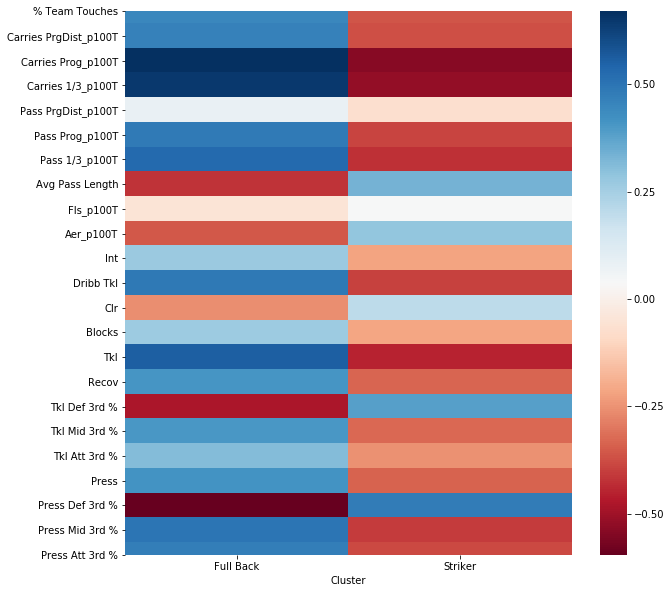

In [15]:
x_gmm0 = df0_stats
x_gmm0["Cluster"] = cluster_gmm0
x_gmm0 = x_gmm0.groupby("Cluster").mean()
labels = ["Full Back", "Striker"]
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(x_gmm0.T, cmap="RdBu", xticklabels=labels, ax=ax) #annot=True

In [16]:
mapping = {0:"Ball-playing Defender", 1:"Conservative Defender"}
df0["cluster_gmm_new"] = [mapping[i] for i in df0["cluster_gmm_new"]]

In [20]:
df0.to_csv("Centre Backs 22-05-06.csv", index=False)